### Feature selection after Gaussian filter

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import math

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**Data Loading**

In [2]:
ventpos = pd.read_csv("/Users/xinyuyangren/Desktop/1demo.csv")
ventpos = ventpos.fillna(method='backfill')
ventpos.head()

,dt,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,...,wc_lr,wc_kitchen,wc_br3,wc_br2,wc_attic,avg_windspeed,avg_irradiation,avg_rh,avg_t,op
0,2013-01-01 00:00:17,22.08,45.46,1278.3,4.9606,18.70,49.97,523.9,4.9614,20.68,...,t,t,t,t,t,4,181,72,7.7,0
1,2013-01-01 00:03:17,22.10,45.56,1308.7,4.9609,18.71,49.97,525.1,4.9615,20.69,...,t,t,t,t,t,4,181,72,7.7,0
2,2013-01-01 00:06:17,22.04,45.46,1351.3,4.9610,18.71,49.95,525.1,4.9616,20.68,...,t,t,t,t,t,4,181,72,7.7,0
3,2013-01-01 00:09:17,21.99,45.17,1279.5,4.9582,18.70,49.95,523.9,4.9613,20.69,...,t,t,t,t,t,4,181,72,7.7,0
4,2013-01-01 00:12:17,21.94,45.00,1201.5,4.9612,18.71,49.95,528.7,4.9618,20.69,...,t,t,t,t,t,4,181,72,7.7,0


In [3]:
ventpos.op.value_counts()

 0    327165
-1        44
 1        44
Name: op, dtype: int64

**UnderSampling**

In [4]:
sample_size = math.ceil((sum(ventpos.op == 1) + sum(ventpos.op == -1))/2)
sample_size

44.0

In [5]:
noop_indices = ventpos[ventpos.op == 0].index
noop_indices

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            327243, 327244, 327245, 327246, 327247, 327248, 327249, 327250,
            327251, 327252],
           dtype='int64', length=327165)

In [6]:
random_indices = np.random.choice(noop_indices, sample_size, replace=False)
random_indices

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([327140,  27230, 216492, 153997, 155170, 268554, 180843, 139603,
         7507, 127634, 219987,  83304, 257668, 181112, 128319, 325539,
       274550, 294776, 249610,  26476,  96324, 272479, 209527, 187650,
       163910,  77206, 181547, 190754,  92495, 230259,   7064, 188049,
       191483, 314762, 239153, 310968,    178, 276222, 120705,  68319,
       287992, 288605, 153923, 272163])

In [7]:
noop_sample = ventpos.loc[random_indices]

In [8]:
up_sample = ventpos[ventpos.op == 1]
down_sample = ventpos[ventpos.op == -1]
op_sample = pd.concat([up_sample,down_sample])
op_sample.head()

,dt,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,...,wc_lr,wc_kitchen,wc_br3,wc_br2,wc_attic,avg_windspeed,avg_irradiation,avg_rh,avg_t,op
191,2013-01-01 09:33:17,20.49,47.29,790.0,4.9610,17.94,52.80,539.7,4.9617,20.61,...,t,t,f,t,t,1,-2,84,5.7,1
12316,2013-01-26 17:19:48,22.77,28.86,1300.1,4.9614,19.83,26.62,537.3,4.9623,19.73,...,t,t,t,t,t,3,1,94,0.1,1
12571,2013-03-01 04:03:08,22.15,26.81,708.3,4.9612,20.57,28.67,597.0,4.9620,20.22,...,t,t,t,t,t,1,-8,87,-1.1,1
12612,2013-03-01 07:06:08,21.38,28.33,720.5,4.9613,20.50,28.88,551.9,4.9619,20.16,...,t,t,t,t,t,0,-576,0,-90.0,1
38187,2013-04-27 11:39:10,19.91,32.35,571.9,4.9607,21.80,37.20,806.5,4.9613,22.03,...,t,t,f,t,t,2,658,57,9.4,1


**Feature selection: up operation**

In [9]:
undersampled_up = pd.concat([down_sample,noop_sample])
undersampled_up.head()

,dt,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,...,wc_lr,wc_kitchen,wc_br3,wc_br2,wc_attic,avg_windspeed,avg_irradiation,avg_rh,avg_t,op
211,2013-01-01 10:33:17,20.20,47.32,808.2,4.9612,17.20,51.75,528.8,4.9617,20.56,...,t,t,f,t,t,2,-2,82,6.1,-1
12364,2013-01-26 19:43:48,23.00,30.45,1188.1,4.9615,19.85,26.96,545.8,4.9621,19.73,...,t,t,t,t,t,3,-3,94,0.3,-1
12661,2013-03-01 09:33:08,21.51,29.33,768.0,4.9615,20.50,29.81,603.0,4.9622,20.14,...,t,t,t,t,t,0,196,80,1.1,-1
14358,2013-03-05 04:22:23,21.15,25.64,626.8,4.9582,20.89,25.11,498.3,4.9616,20.61,...,t,t,t,t,t,1,-7,70,4.2,-1
38200,2013-04-27 12:18:10,20.00,32.94,615.8,4.9609,21.39,35.49,581.1,4.9614,22.00,...,t,t,f,t,t,3,577,55,9.5,-1


In [10]:
#generate month/hour attribute from datetime string
undersampled_up.dt = pd.to_datetime(undersampled_up.dt)
t = pd.DatetimeIndex(undersampled_up.dt)
hr = t.hour
undersampled_up['HourOfDay'] = hr
month = t.month
undersampled_up['Month'] = month
year = t.year
undersampled_up['Year'] = year
undersampled_up.head()

,dt,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,...,wc_br2,wc_attic,avg_windspeed,avg_irradiation,avg_rh,avg_t,op,HourOfDay,Month,Year
211,2013-01-01 10:33:17,20.20,47.32,808.2,4.9612,17.20,51.75,528.8,4.9617,20.56,...,t,t,2,-2,82,6.1,-1,10,1,2013
12364,2013-01-26 19:43:48,23.00,30.45,1188.1,4.9615,19.85,26.96,545.8,4.9621,19.73,...,t,t,3,-3,94,0.3,-1,19,1,2013
12661,2013-03-01 09:33:08,21.51,29.33,768.0,4.9615,20.50,29.81,603.0,4.9622,20.14,...,t,t,0,196,80,1.1,-1,9,3,2013
14358,2013-03-05 04:22:23,21.15,25.64,626.8,4.9582,20.89,25.11,498.3,4.9616,20.61,...,t,t,1,-7,70,4.2,-1,4,3,2013
38200,2013-04-27 12:18:10,20.00,32.94,615.8,4.9609,21.39,35.49,581.1,4.9614,22.00,...,t,t,3,577,55,9.5,-1,12,4,2013


In [11]:
for col in undersampled_up:
    print col

dt
t_lr
rh_lr
co2_lr
con_lr
t_br3
rh_br3
co2_br3
con_br3
t_br2
rh_br2
co2_br2
con_br2
t_supply_air_after_ventilation_unit
pulse_channel_ventilation_unit
wc_lr
wc_kitchen
wc_br3
wc_br2
wc_attic
avg_windspeed
avg_irradiation
avg_rh
avg_t
op
HourOfDay
Month
Year


In [12]:
# Remap string closed and open to 0 and 1, for the calculaiton of no. of open windows
def remap(x):
    if x == 't':
        x = 0
    else:
        x = 1
    return x

for col in ['wc_lr', 'wc_kitchen', 'wc_br3', 'wc_br2', 'wc_attic']:
    w = undersampled_up[col].apply(remap)
    undersampled_up[col] = w
undersampled_up.head()

,dt,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,...,wc_br2,wc_attic,avg_windspeed,avg_irradiation,avg_rh,avg_t,op,HourOfDay,Month,Year
211,2013-01-01 10:33:17,20.20,47.32,808.2,4.9612,17.20,51.75,528.8,4.9617,20.56,...,0,0,2,-2,82,6.1,-1,10,1,2013
12364,2013-01-26 19:43:48,23.00,30.45,1188.1,4.9615,19.85,26.96,545.8,4.9621,19.73,...,0,0,3,-3,94,0.3,-1,19,1,2013
12661,2013-03-01 09:33:08,21.51,29.33,768.0,4.9615,20.50,29.81,603.0,4.9622,20.14,...,0,0,0,196,80,1.1,-1,9,3,2013
14358,2013-03-05 04:22:23,21.15,25.64,626.8,4.9582,20.89,25.11,498.3,4.9616,20.61,...,0,0,1,-7,70,4.2,-1,4,3,2013
38200,2013-04-27 12:18:10,20.00,32.94,615.8,4.9609,21.39,35.49,581.1,4.9614,22.00,...,0,0,3,577,55,9.5,-1,12,4,2013


In [13]:
openwin = undersampled_up.wc_attic + undersampled_up.wc_br2 + undersampled_up.wc_br3 + undersampled_up.wc_kitchen + undersampled_up.wc_lr
undersampled_up['openwin'] = openwin;

In [14]:
undersampled_up = undersampled_up.drop(['wc_lr', 'wc_kitchen', 'wc_br3', 'wc_br2', 'wc_attic','Year','dt','pulse_channel_ventilation_unit'],axis = 1)
undersampled_up.head()

,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,rh_br2,...,con_br2,t_supply_air_after_ventilation_unit,avg_windspeed,avg_irradiation,avg_rh,avg_t,op,HourOfDay,Month,openwin
211,20.20,47.32,808.2,4.9612,17.20,51.75,528.8,4.9617,20.56,45.27,...,4.9606,18.49,2,-2,82,6.1,-1,10,1,1
12364,23.00,30.45,1188.1,4.9615,19.85,26.96,545.8,4.9621,19.73,34.46,...,4.9609,17.40,3,-3,94,0.3,-1,19,1,0
12661,21.51,29.33,768.0,4.9615,20.50,29.81,603.0,4.9622,20.14,31.05,...,4.9610,17.15,0,196,80,1.1,-1,9,3,0
14358,21.15,25.64,626.8,4.9582,20.89,25.11,498.3,4.9616,20.61,29.35,...,4.9604,17.78,1,-7,70,4.2,-1,4,3,0
38200,20.00,32.94,615.8,4.9609,21.39,35.49,581.1,4.9614,22.00,33.32,...,4.9593,20.01,3,577,55,9.5,-1,12,4,1


In [15]:
for col in undersampled_up:
    print col

t_lr
rh_lr
co2_lr
con_lr
t_br3
rh_br3
co2_br3
con_br3
t_br2
rh_br2
co2_br2
con_br2
t_supply_air_after_ventilation_unit
avg_windspeed
avg_irradiation
avg_rh
avg_t
op
HourOfDay
Month
openwin


**Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [17]:
#shuffle the order
undersampled_up = undersampled_up.reindex(np.random.permutation(undersampled_up.index))
undersampled_up.head()

,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,rh_br2,...,con_br2,t_supply_air_after_ventilation_unit,avg_windspeed,avg_irradiation,avg_rh,avg_t,op,HourOfDay,Month,openwin
44656,20.01,48.07,930.0,4.9605,21.14,43.61,579.9,4.9612,22.11,41.45,...,4.9599,20.32,3,387,73,11.5,-1,13,5,1
296500,20.56,55.95,718.2,4.9613,19.85,59.44,709.1,4.9620,21.21,55.26,...,4.9608,20.30,5,278,75,15.1,-1,10,11,1
287365,19.80,58.25,971.4,4.9615,18.51,59.31,614.0,4.9622,20.48,52.48,...,4.9611,19.22,3,31,94,11.2,-1,9,10,1
290903,20.93,55.59,1464.7,4.9616,17.94,51.90,589.6,4.9621,20.95,49.75,...,4.9608,16.48,8,4,65,11.7,-1,18,10,1
200110,17.74,39.32,768.1,4.9617,20.04,33.84,545.8,4.9621,20.16,33.90,...,4.9611,18.73,3,320,57,9.3,-1,13,4,1


In [18]:
y = undersampled_up.pop('op')

In [19]:
# Columnwise Normalizaion

from sklearn import preprocessing
X_scaled = pd.DataFrame()
for col in undersampled_up:
    X_scaled[col] = preprocessing.scale(undersampled_up[col])
X_scaled.head()

/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/xinyuyangren/anaconda/lib/python2.7/site-packages/sklearn/uti

,t_lr,rh_lr,co2_lr,con_lr,t_br3,rh_br3,co2_br3,con_br3,t_br2,rh_br2,co2_br2,con_br2,t_supply_air_after_ventilation_unit,avg_windspeed,avg_irradiation,avg_rh,avg_t,HourOfDay,Month,openwin
0,-0.758190,-0.127639,0.781210,-0.099570,0.099226,-0.461393,-0.255486,-0.211882,0.067187,-0.504626,-0.037309,-0.106799,0.104081,0.751112,1.062306,-0.397388,-0.126779,0.230010,-0.540754,0.146616
1,-0.486425,0.437847,-0.481156,0.555544,-0.393305,0.669572,0.798189,0.565018,-0.362983,0.712695,-0.230440,0.648421,0.095986,1.998242,0.527641,-0.274254,0.367847,-0.327078,1.179234,0.146616
2,-0.861955,0.602900,1.027961,0.719322,-0.904926,0.660284,0.022613,0.759243,-0.711898,0.467644,-0.445719,0.900160,-0.341126,0.751112,-0.683938,0.895523,-0.167998,-0.512773,0.892570,0.146616
3,-0.303602,0.412013,3.968117,0.801211,-1.122556,0.130881,-0.176379,0.662131,-0.487254,0.227001,0.651937,0.648421,-1.450094,3.868936,-0.816378,-0.889926,-0.099300,1.158488,0.892570,0.146616
4,-1.879838,-0.755558,-0.183743,0.883100,-0.320761,-1.159404,-0.533584,0.662131,-0.864847,-1.170142,-0.887793,0.900160,-0.539445,0.751112,0.733659,-1.382463,-0.429051,0.230010,-0.827419,0.146616


In [20]:
from sklearn import cross_validation
lg = LogisticRegression(penalty='l1',C = 0.1)
scores = cross_validation.cross_val_score(lg, X_scaled, y, cv=10)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.30)


In [21]:
clf = lg.fit(X_scaled, y)

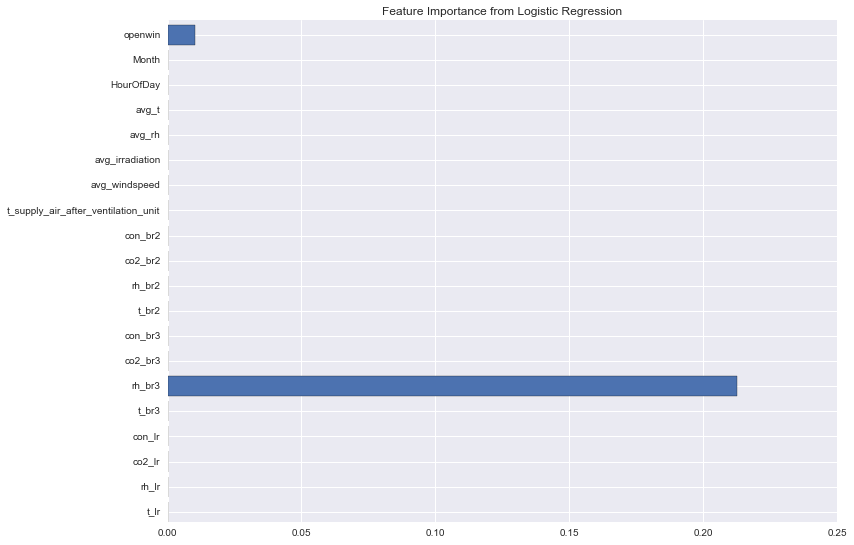

In [22]:
plt.figure(figsize=(12,9))
y_pos = np.arange(len(X_scaled.columns))
plt.barh(y_pos,abs(clf.coef_[0]))
plt.yticks(y_pos + 0.4,X_scaled.columns)
plt.title('Feature Importance from Logistic Regression')

**REFCV FEATURE OPTIMIZATIN**

In [23]:
from sklearn.feature_selection import RFECV

In [24]:
selector = RFECV(lg, step=1, cv=10)
selector = selector.fit(X_scaled, y)
mask = selector.support_ 
mask

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

In [25]:
selector.ranking_

array([20, 19, 18, 17, 16,  1, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2])

In [26]:
X_scaled.keys()[mask]

Index([u'rh_br3'], dtype='object')

In [27]:
selector.score(X_scaled, y)

0.63636363636363635

In [28]:
X_selected = pd.DataFrame()
for col in X_scaled.keys()[mask]:
    X_selected[col] = X_scaled[col]
X_selected.head()

,rh_br3
0,-0.461393
1,0.669572
2,0.660284
3,0.130881
4,-1.159404


In [29]:
scores = cross_validation.cross_val_score(lg, X_selected, y, cv=10)
# The mean score and the 95% confidence interval of the score estimate
scores

array([ 0.7  ,  0.3  ,  0.7  ,  0.8  ,  0.5  ,  0.75 ,  0.5  ,  0.625,
        0.625,  0.875])

In [30]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.64 (+/- 0.32)


In [31]:
clf_final = lg.fit(X_selected,y)

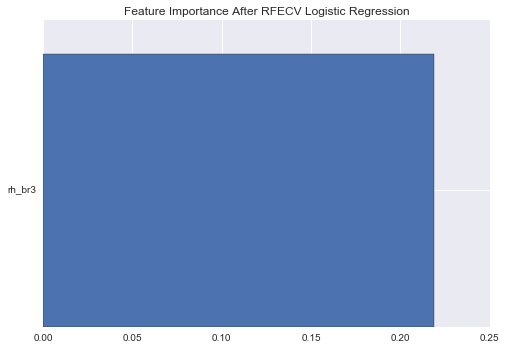

In [42]:
y_pos = np.arange(len(X_selected.columns))
plt.barh(y_pos,abs(clf_final.coef_[0]))
plt.yticks(y_pos + 0.4,X_selected.columns)
plt.title('Feature Importance After RFECV Logistic Regression')